# Diagnosing relationship of breaths to ventilator

Import libraries

In [1]:
#%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate as interp
# IMPORT Ole's fixed TMSiSDK python interfacwe- may change
sys.path.insert(0,'C:/Projects/tmsi-python-interface')
from TMSiSDK.file_readers import Poly5Reader
import collections
import math
sys.path.insert(0, '../resurfemg')
import helper_functions as hf

C:\Users\makeda\anaconda3\envs\remgenv-4\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\remgenv-4\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\remgenv-4\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


In [2]:
# do not rerun this cell
big_data_list= []

In [3]:
stacked_emg_directory = 'output_emg_processed'
os.listdir(stacked_emg_directory )

['not_pushedtopspin_data_anonymizedM002005EMG_recording']

In [4]:
file_name = os.path.join(stacked_emg_directory,'not_pushedtopspin_data_anonymizedM002005EMG_recording')

In [5]:
file = np.load(file_name)

In [6]:
file

array([[-5.82309022e-04, -7.57819632e-03, -1.04113352e-02, ...,
        -2.23197006e-03, -1.71739403e-03, -2.99395474e-04],
       [-3.84415899e-04, -8.14641509e-02, -1.16222958e-01, ...,
        -3.18765983e-02, -2.60410834e-02, -9.92295978e-03],
       [ 5.02129984e+00,  5.02129984e+00,  5.07130003e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.97669983e+00, -6.61670017e+00, -6.34660006e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.86008987e+01,  4.72509003e+01,  4.59007988e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e-02,  2.00000000e-02, ...,
         4.64070000e+02,  4.64080000e+02,  4.64090000e+02]])

In [7]:
emg_lead = file[0]
emg_lead.shape

(46410,)

In [8]:
emg_lead[0:200]

array([-0.00058231, -0.0075782 , -0.01041134, -0.00952383, -0.00791661,
       -0.00698072, -0.00612431, -0.00467318, -0.00269839, -0.00069887,
        0.0006677 ,  0.0007306 , -0.00075103, -0.00320877, -0.00559971,
       -0.00719296, -0.00794143, -0.0081972 , -0.00827917, -0.00831325,
       -0.0083103 , -0.00827321, -0.00822165, -0.00816312, -0.00808871,
       -0.00800284, -0.00793233, -0.00789806, -0.0078703 , -0.00773364,
       -0.00732841, -0.00659206, -0.00569269, -0.00502082, -0.00493205,
       -0.00535997, -0.00581156, -0.00591438, -0.00583139, -0.00600651,
       -0.00661986, -0.00740229, -0.00795496, -0.00815045, -0.00815364,
       -0.00813397, -0.0080976 , -0.00800406, -0.00793082, -0.00798038,
       -0.00796227, -0.00744247, -0.00664366, -0.00704604, -0.00943747,
       -0.01063049, -0.00515815,  0.00662181,  0.0155332 ,  0.01376993,
        0.00474164, -0.00241425, -0.00412481, -0.00338596, -0.00332047,
       -0.00415344, -0.00488913, -0.00509237, -0.00493821, -0.00

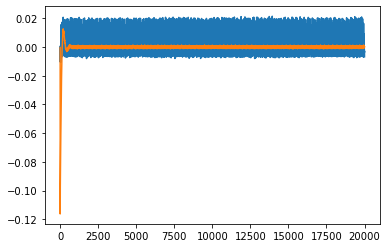

In [13]:
plt.plot(emg_lead[0:20000])
plt.plot(file[1][0:20000])
plt.show()

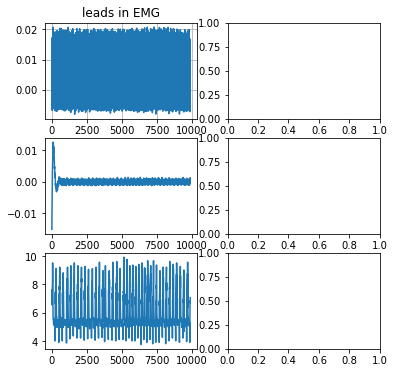

In [15]:
%matplotlib inline
# set up plot, show
x_emg = file
#x_draeger = data_draeger_samples
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(x_emg[0][100:10000])
axis[0, 0].set(title='leads in EMG')
axis[1, 0].plot(x_emg[1][100:10000])
axis[2, 0].plot(x_emg[2][100:10000])
# axis[0, 1].set(title='leads in Draeger')
# axis[0, 1].grid(True)
# axis[0, 1].plot(x_draeger[0])
# axis[1, 1].plot(x_draeger[1])
# axis[2, 1].plot(x_draeger[2])

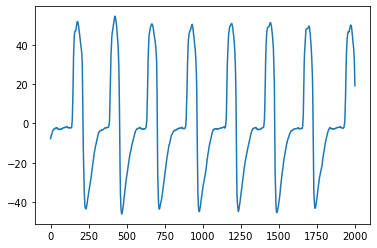

In [17]:
plt.plot(x_emg[3][1000:3000])
plt.show()

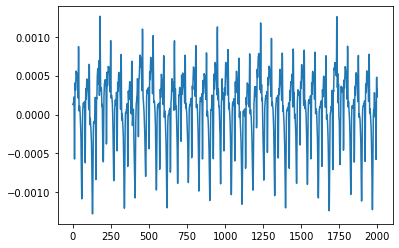

In [18]:
plt.plot(x_emg[1][1000:3000])
plt.show()

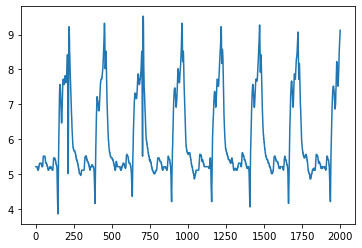

In [19]:
plt.plot(x_emg[2][1000:3000])
plt.show()

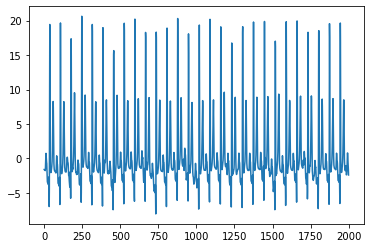

In [21]:
plt.plot(x_emg[0][1000:3000]*1000)
plt.show()